In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix
import sklearn.neural_network as nn 
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV


In [2]:
df = pd.read_csv('train.csv')

In [3]:
train , test = train_test_split(df,test_size=0.20,random_state=1)

In [4]:
print(train.shape)
print(test.shape)

(5881, 563)
(1471, 563)


In [73]:
y= train['Activity']
features = train.drop(['Activity','subject'],axis=1)
testX = test.drop(['Activity','subject'],axis=1)

In [74]:
clf = ExtraTreesClassifier()
clf = clf.fit(features, y)
model = SelectFromModel(clf, prefit=True)
Xtrain = model.transform(features)
Xtest = model.transform(testX)
print(Xtrain.shape)

C:\Users\ven_n_000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(5881, 98)


In [8]:
features.isna().sum().sum()

0

In [9]:
y.value_counts()

LAYING                1134
STANDING              1092
SITTING               1032
WALKING                979
WALKING_UPSTAIRS       843
WALKING_DOWNSTAIRS     801
Name: Activity, dtype: int64

In [10]:
cat=['LAYING','STANDING',"SITTING",'WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS']

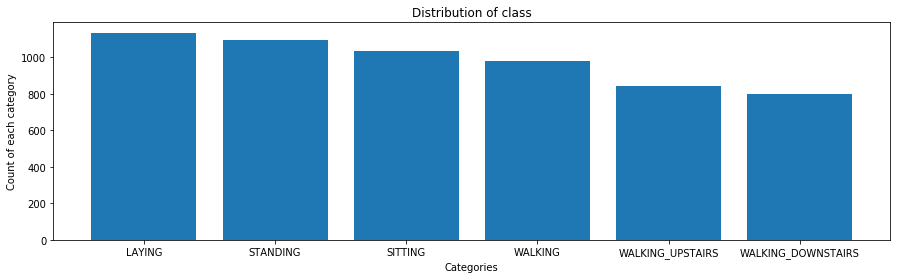

In [11]:
plt.figure(figsize=(15,4))
plt.bar(cat,y.value_counts())
plt.xlabel('Categories')
plt.ylabel('Count of each category')
plt.title('Distribution of class')
plt.show()

In [12]:
cols=features.columns
for i in cols:
    print(i)

tBodyAcc-mean()-X
tBodyAcc-mean()-Y
tBodyAcc-mean()-Z
tBodyAcc-std()-X
tBodyAcc-std()-Y
tBodyAcc-std()-Z
tBodyAcc-mad()-X
tBodyAcc-mad()-Y
tBodyAcc-mad()-Z
tBodyAcc-max()-X
tBodyAcc-max()-Y
tBodyAcc-max()-Z
tBodyAcc-min()-X
tBodyAcc-min()-Y
tBodyAcc-min()-Z
tBodyAcc-sma()
tBodyAcc-energy()-X
tBodyAcc-energy()-Y
tBodyAcc-energy()-Z
tBodyAcc-iqr()-X
tBodyAcc-iqr()-Y
tBodyAcc-iqr()-Z
tBodyAcc-entropy()-X
tBodyAcc-entropy()-Y
tBodyAcc-entropy()-Z
tBodyAcc-arCoeff()-X,1
tBodyAcc-arCoeff()-X,2
tBodyAcc-arCoeff()-X,3
tBodyAcc-arCoeff()-X,4
tBodyAcc-arCoeff()-Y,1
tBodyAcc-arCoeff()-Y,2
tBodyAcc-arCoeff()-Y,3
tBodyAcc-arCoeff()-Y,4
tBodyAcc-arCoeff()-Z,1
tBodyAcc-arCoeff()-Z,2
tBodyAcc-arCoeff()-Z,3
tBodyAcc-arCoeff()-Z,4
tBodyAcc-correlation()-X,Y
tBodyAcc-correlation()-X,Z
tBodyAcc-correlation()-Y,Z
tGravityAcc-mean()-X
tGravityAcc-mean()-Y
tGravityAcc-mean()-Z
tGravityAcc-std()-X
tGravityAcc-std()-Y
tGravityAcc-std()-Z
tGravityAcc-mad()-X
tGravityAcc-mad()-Y
tGravityAcc-mad()-Z
tGravityAcc-m

In [13]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in features.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyGyro,79
fBodyAcc,79
fBodyAccJerk,79
tBodyAcc,40
tBodyAccJerk,40
tBodyGyro,40
tBodyGyroJerk,40
tGravityAcc,40
fBodyBodyGyroJerkMag,13
fBodyBodyGyroMag,13


In [17]:
data = features.copy()
#subject = features.pop('subject')
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(data)

In [21]:
y=pd.DataFrame(y)
tsne_transformed=pd.DataFrame(tsne_transformed)
y.set_index(pd.Index(range(5881)))

,Activity
0,WALKING_UPSTAIRS
1,WALKING
2,WALKING_DOWNSTAIRS
3,STANDING
4,LAYING
...,...
5876,LAYING
5877,WALKING
5878,STANDING
5879,SITTING


In [22]:
pd.crosstab(train.subject, train.Activity)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,39,36,44,77,40,39
3,52,41,50,49,43,48
5,42,38,46,46,40,39
6,42,47,42,48,40,39
7,42,37,42,44,42,42
8,40,39,48,44,32,33
11,46,41,42,44,37,41
14,44,37,48,48,32,43
15,63,50,42,39,34,35


Text(0.5, 1.0, 'Boxplot of tBodyAccMag-mean() column across various activities')

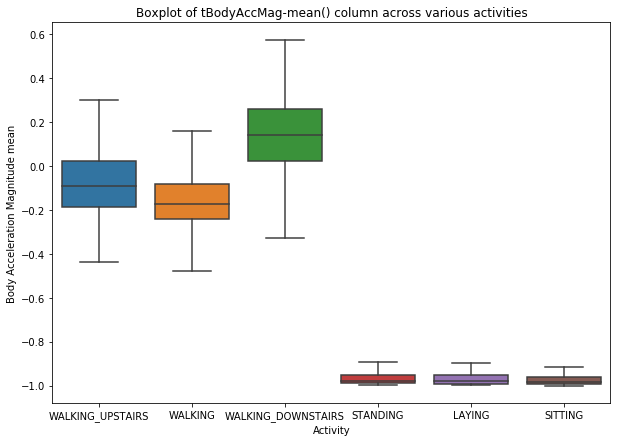

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train, showfliers=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")

Text(0.5, 1.0, 'Box plot of angle(X,gravityMean) column across various activities')

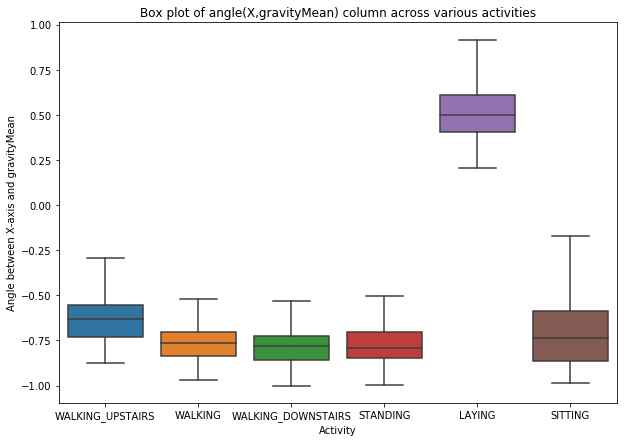

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')

In [25]:
tsne_transformed['Activity'] = y['Activity']
tsne_transformed.columns = ['f1','f2','Activity']

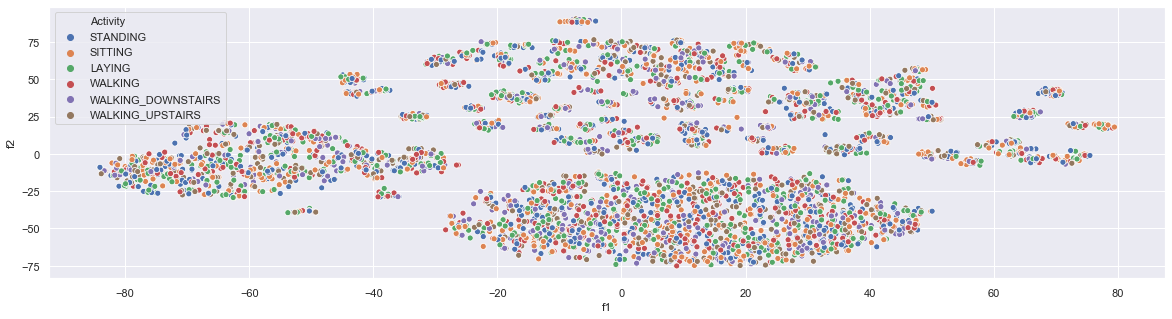

In [26]:
sns.set()
plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="f1", y="f2", hue="Activity",
                     data=tsne_transformed)

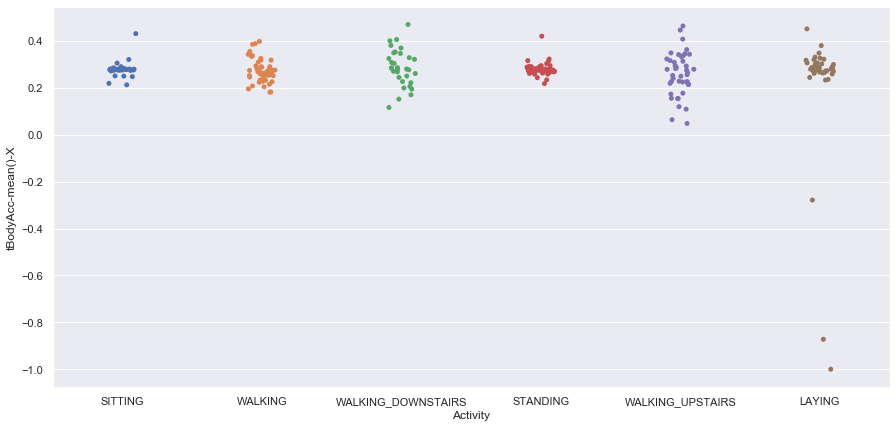

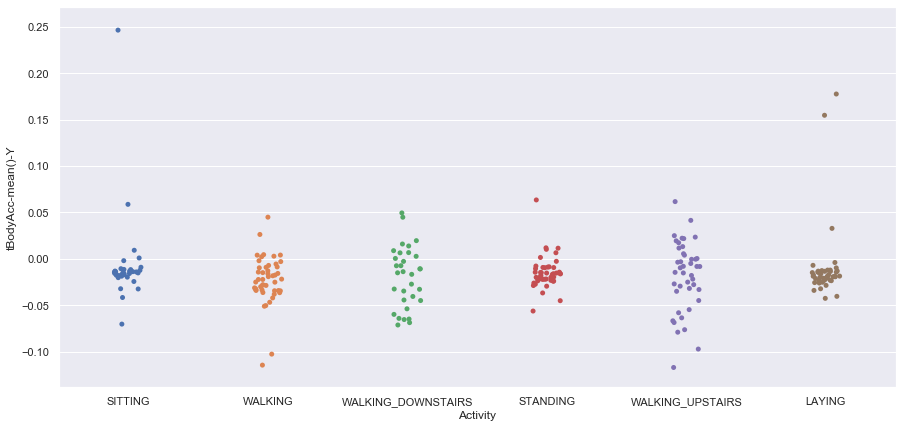

In [27]:
sub14 = train.loc[train['subject']==14]
fig = plt.figure(figsize=(15,7))

sns.stripplot(x='Activity', y=sub14.iloc[:,0], data=sub14, jitter=True)
plt.show()
fig = plt.figure(figsize=(15,7))

sns.stripplot(x='Activity', y=sub14.iloc[:,1], data=sub14, jitter=True)
plt.show()

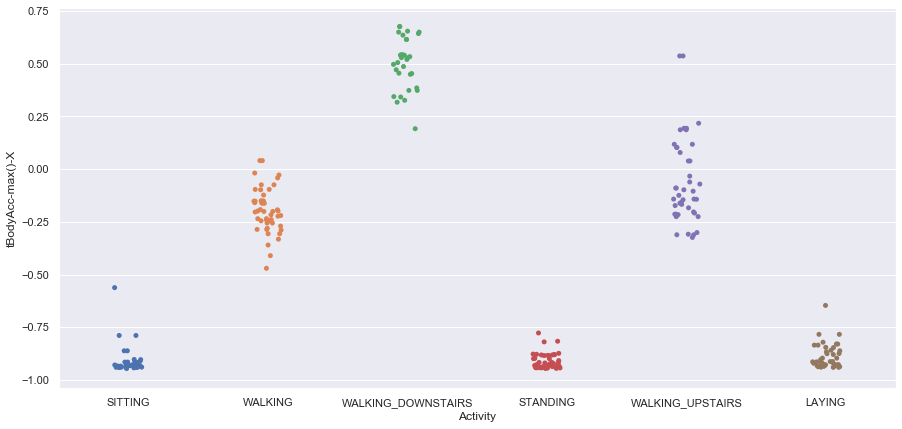

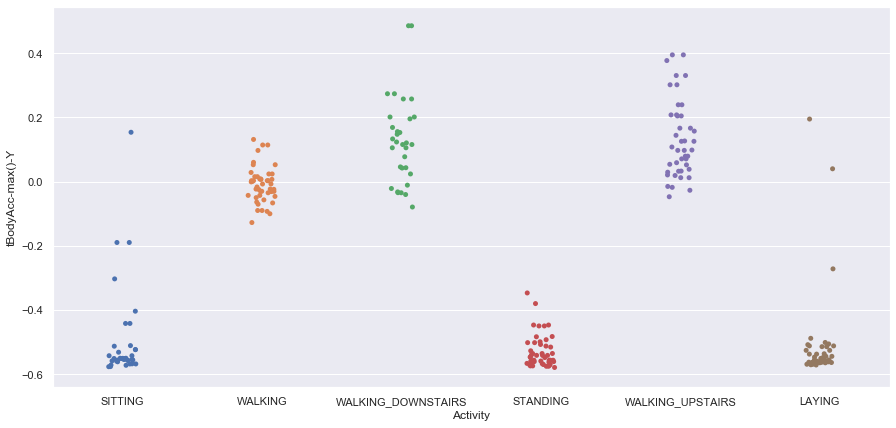

In [28]:
fig = plt.figure(figsize=(15,7))

sns.stripplot(x='Activity', y='tBodyAcc-max()-X', data=sub14, jitter=True)
plt.show()
fig = plt.figure(figsize=(15,7))
sns.stripplot(x='Activity', y='tBodyAcc-max()-Y', data=sub14, jitter=True)
plt.show()

In [57]:
y_train = train['Activity']
X_train = train.drop(['Activity','subject'],axis=1)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
X_test = test.drop(['Activity','subject'],axis=1)
y_test = test['Activity']
y_test = le.fit_transform(y_test)

In [59]:
y_test.shape

(1471,)

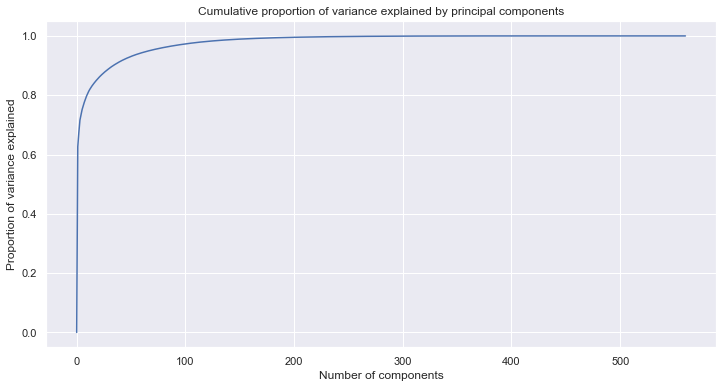

In [52]:
pca = PCA(n_components=X_train.shape[1])

pca.fit(X_train)
cumulative_variance = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(X_train.shape[1])]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(cumulative_variance)
ax.set_title('Cumulative proportion of variance explained by principal components')
ax.set_xlabel('Number of components')
ax.set_ylabel('Proportion of variance explained')

plt.show()

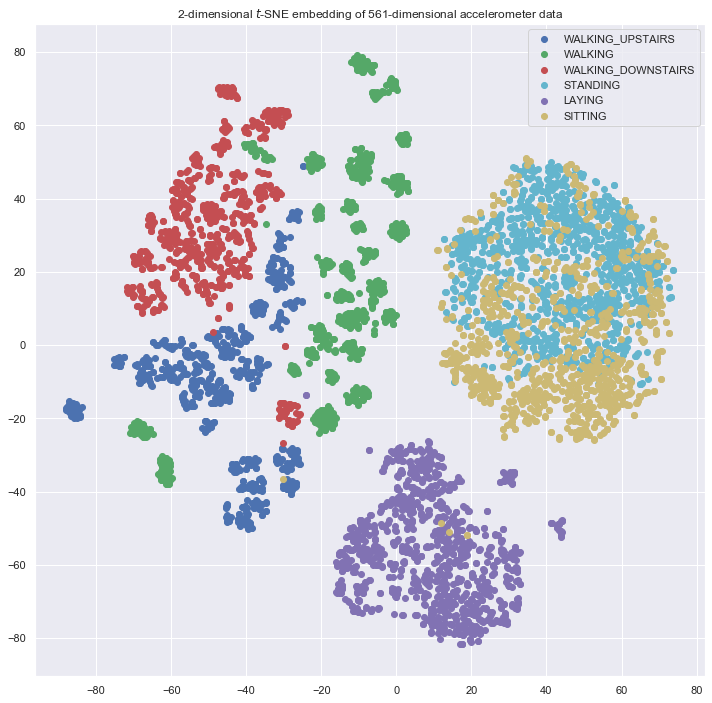

In [53]:
tsne = TSNE()

X_reduced = tsne.fit_transform(X_train)
tsne_data = pd.DataFrame(
    {'X':X_reduced[:,0], 'Y':X_reduced[:,1], 
     'activity':train['Activity']})

activities = list(tsne_data['activity'].unique())
colormap = ['b', 'g', 'r', 'c', 'm', 'y']

fig, ax = plt.subplots(figsize=(12,12))
for i in range(len(activities)):
    plot_data = tsne_data.loc[tsne_data['activity'] == activities[i]]
    ax.scatter('X', 'Y', data=plot_data, color=colormap[i], label=activities[i])
ax.set_title('2-dimensional $t$-SNE embedding of 561-dimensional accelerometer data')
ax.legend()

plt.show()

In [64]:

pca = PCA(n_components=100)

X_train=pca.fit_transform(X_train)
cumulative_variance = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(X_train.shape[1])]
X_test=pca.fit_transform(X_test)

In [55]:

mlpSGD  =  nn.MLPClassifier(hidden_layer_sizes=(90,)  , max_iter=1000 , alpha=1e-4  , solver='sgd' , tol=1e-19 , random_state=1  , learning_rate_init=.001) 
mlpSGD .fit(X_train , y_train)
pred = mlpSGD.predict(X_test)
proba = mlpSGD.predict_proba(X_test)

acc = metrics.accuracy_score(y_test, pred)
print("Accuracy")
print(acc)
cm=multilabel_confusion_matrix(y_test, pred)
print("Classification Report")
print( classification_report(y_test,pred))

Accuracy
0.6614547926580557
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       273
           1       0.58      0.59      0.59       254
           2       0.70      0.67      0.68       282
           3       0.50      0.52      0.51       247
           4       0.36      0.30      0.33       185
           5       0.77      0.84      0.81       230

    accuracy                           0.66      1471
   macro avg       0.64      0.64      0.64      1471
weighted avg       0.65      0.66      0.66      1471



C:\Users\ven_n_000\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [75]:
# mlpSGD  =  nn.MLPClassifier(hidden_layer_sizes=(90,)  , max_iter=1000 , alpha=1e-4  , solver='sgd' , tol=1e-19 , random_state=1  , learning_rate_init=.001) 
#                      , learning_rate_init=.001) 
mlpSGD .fit(Xtrain , y_train)
pred = mlpSGD.predict(Xtest)
proba = mlpSGD.predict_proba(Xtest)

acc = metrics.accuracy_score(y_test, pred)
print("Accuracy")
print(acc)
cm=multilabel_confusion_matrix(y_test, pred)
print("Classification Report")
print( classification_report(y_test,pred))

Accuracy
0.9687287559483345
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       0.92      0.93      0.92       254
           2       0.94      0.92      0.93       282
           3       1.00      0.99      0.99       247
           4       0.99      0.99      0.99       185
           5       0.98      0.99      0.98       230

    accuracy                           0.97      1471
   macro avg       0.97      0.97      0.97      1471
weighted avg       0.97      0.97      0.97      1471



C:\Users\ven_n_000\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [76]:
mlpAdam  =  nn.MLPClassifier(hidden_layer_sizes=(90,)  , max_iter=1000 , alpha=1e-4  , solver='adam' , tol=1e-19 , random_state=1  , learning_rate_init=.001) 
                    
mlpAdam .fit(X_train , y_train)
pred = mlpAdam.predict(X_test)
proba = mlpAdam.predict_proba(X_test)

acc = metrics.accuracy_score(y_test, pred)
print("Accuracy")
print(acc)
cm=multilabel_confusion_matrix(y_test, pred)
print("Classification Report")
print( classification_report(y_test,pred))

Accuracy
0.6594153636981646
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       273
           1       0.55      0.53      0.54       254
           2       0.69      0.69      0.69       282
           3       0.54      0.51      0.52       247
           4       0.43      0.35      0.38       185
           5       0.72      0.87      0.79       230

    accuracy                           0.66      1471
   macro avg       0.64      0.64      0.64      1471
weighted avg       0.65      0.66      0.65      1471



In [77]:
mlpAdam .fit(Xtrain , y_train)
pred = mlpAdam.predict(Xtest)
proba = mlpAdam.predict_proba(Xtest)

acc = metrics.accuracy_score(y_test, pred)
print("Accuracy")
print(acc)
cm=multilabel_confusion_matrix(y_test, pred)
print("Classification Report")
print( classification_report(y_test,pred))

Accuracy
0.9843643779741672
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       0.93      1.00      0.96       254
           2       1.00      0.93      0.96       282
           3       1.00      1.00      1.00       247
           4       0.99      0.99      0.99       185
           5       1.00      1.00      1.00       230

    accuracy                           0.98      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.98      0.98      1471



In [78]:
RF = RandomForestClassifier(criterion='entropy',n_estimators=100,n_jobs=-1)
RF.fit(X_train,y_train)
pred = RF.predict(X_test)
proba = RF.predict_proba(X_test)

acc = metrics.accuracy_score(y_test, pred)
print("Accuracy")
print(acc)
cm=multilabel_confusion_matrix(y_test, pred)
print("Classification Report")
print( classification_report(y_test,pred))

Accuracy
0.7328348062542488
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.65      0.54      0.59       254
           2       0.69      0.77      0.73       282
           3       0.68      0.72      0.70       247
           4       0.61      0.46      0.52       185
           5       0.76      0.86      0.81       230

    accuracy                           0.73      1471
   macro avg       0.72      0.72      0.72      1471
weighted avg       0.73      0.73      0.73      1471



In [79]:
RF.fit(Xtrain,y_train)
pred = RF.predict(Xtest)
proba = RF.predict_proba(Xtest)

acc = metrics.accuracy_score(y_test, pred)
print("Accuracy")
print(acc)
cm=multilabel_confusion_matrix(y_test, pred)
print("Classification Report")
print( classification_report(y_test,pred))

Accuracy
0.9809653297076818
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       0.97      0.96      0.96       254
           2       0.96      0.97      0.97       282
           3       1.00      0.99      1.00       247
           4       0.97      0.99      0.98       185
           5       0.98      0.98      0.98       230

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



In [80]:

KNN_Classifier = KNeighborsClassifier(n_neighbors=5)
KNN_Classifier.fit(X_train, y_train)
pred = KNN_Classifier.predict(X_test)
proba = KNN_Classifier.predict_proba(X_test)

acc = metrics.accuracy_score(y_test, pred)
print("Accuracy")
print(acc)
cm=multilabel_confusion_matrix(y_test, pred)
print("Classification Report")
print( classification_report(y_test,pred))

Accuracy
0.7199184228416043
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       273
           1       0.70      0.50      0.59       254
           2       0.68      0.85      0.76       282
           3       0.57      0.67      0.62       247
           4       0.57      0.40      0.47       185
           5       0.78      0.83      0.80       230

    accuracy                           0.72      1471
   macro avg       0.71      0.70      0.70      1471
weighted avg       0.72      0.72      0.71      1471



In [81]:

KNN_Classifier = KNeighborsClassifier(n_neighbors=5)
KNN_Classifier.fit(Xtrain, y_train)
pred = KNN_Classifier.predict(Xtest)
proba = KNN_Classifier.predict_proba(Xtest)

acc = metrics.accuracy_score(y_test, pred)
print("Accuracy")
print(acc)
cm=multilabel_confusion_matrix(y_test, pred)
print("Classification Report")
print( classification_report(y_test,pred))

Accuracy
0.9612508497620667
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       0.94      0.84      0.89       254
           2       0.87      0.95      0.91       282
           3       1.00      1.00      1.00       247
           4       0.99      0.99      0.99       185
           5       0.99      0.99      0.99       230

    accuracy                           0.96      1471
   macro avg       0.97      0.96      0.96      1471
weighted avg       0.96      0.96      0.96      1471



In [82]:
KNN_Classifier = KNeighborsClassifier(n_neighbors=11)
KNN_Classifier.fit(Xtrain, y_train)
pred = KNN_Classifier.predict(Xtest)
proba = KNN_Classifier.predict_proba(Xtest)

acc = metrics.accuracy_score(y_test, pred)
print("Accuracy")
print(acc)
cm=multilabel_confusion_matrix(y_test, pred)
print("Classification Report")
print( classification_report(y_test,pred))

Accuracy
0.9605710401087696
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       273
           1       0.96      0.83      0.89       254
           2       0.87      0.97      0.92       282
           3       0.98      1.00      0.99       247
           4       0.99      0.98      0.99       185
           5       0.99      0.98      0.99       230

    accuracy                           0.96      1471
   macro avg       0.97      0.96      0.96      1471
weighted avg       0.96      0.96      0.96      1471



In [83]:
clf1 = LogisticRegression(multi_class='multinomial',solver='lbfgs', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard',n_jobs=-1)
eclf1 = eclf1.fit(X_train, y_train)
pred = eclf1.predict(X_test)

acc = metrics.accuracy_score(y_test, pred)
print("Accuracy")
print(acc)
cm=multilabel_confusion_matrix(y_test, pred)
print("Classification Report")
print( classification_report(y_test,pred))

Accuracy
0.7002039428959891
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       273
           1       0.63      0.55      0.59       254
           2       0.69      0.74      0.71       282
           3       0.61      0.64      0.62       247
           4       0.50      0.41      0.45       185
           5       0.75      0.83      0.79       230

    accuracy                           0.70      1471
   macro avg       0.68      0.69      0.68      1471
weighted avg       0.69      0.70      0.69      1471



In [84]:
eclf1 = eclf1.fit(Xtrain, y_train)
pred = eclf1.predict(Xtest)

acc = metrics.accuracy_score(y_test, pred)
print("Accuracy")
print(acc)
cm=multilabel_confusion_matrix(y_test, pred)
print("Classification Report")
print( classification_report(y_test,pred))

Accuracy
0.9748470428280082
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       0.96      0.92      0.94       254
           2       0.93      0.97      0.95       282
           3       1.00      1.00      1.00       247
           4       0.98      0.99      0.98       185
           5       0.99      0.98      0.99       230

    accuracy                           0.97      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.97      0.97      1471



In [86]:
params = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,16,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)
y_pred = rf_classifier_rs.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
acc = metrics.accuracy_score(y_test,y_pred)
print("Accuracy")
print(acc)
print("Classification Report")
print( classification_report(y_test,y_pred))


C:\Users\ven_n_000\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy
0.7375934738273283
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       273
           1       0.65      0.58      0.61       254
           2       0.71      0.77      0.73       282
           3       0.68      0.68      0.68       247
           4       0.58      0.48      0.53       185
           5       0.78      0.89      0.83       230

    accuracy                           0.74      1471
   macro avg       0.72      0.72      0.72      1471
weighted avg       0.73      0.74      0.73      1471



In [88]:
rf_classifier_rs.fit(Xtrain, y_train)
y_pred = rf_classifier_rs.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
acc = metrics.accuracy_score(y_test,y_pred)
print("Accuracy")
print(acc)
print("Classification Report")
print( classification_report(y_test,y_pred))


C:\Users\ven_n_000\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy
0.9802855200543847
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       0.96      0.95      0.95       254
           2       0.95      0.96      0.96       282
           3       1.00      0.99      1.00       247
           4       0.99      0.99      0.99       185
           5       0.99      0.99      0.99       230

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471

